##Projet

In [8]:
#Importation
import pandas as pd
import matplotlib.pyplot  as plt
import numpy as np
import Traitement as tr
from Graph import Graph

In [10]:
#Lesture des données
data = pd.read_csv('data.csv', sep=';')
data.head(5)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,OECD,QGDP,TOT,PC_CHGPP,A,1962,5.696916,NaN
1,OECD,QGDP,TOT,PC_CHGPP,A,1963,5.175455,NaN
2,OECD,QGDP,TOT,PC_CHGPP,A,1964,6.361377,NaN
3,OECD,QGDP,TOT,PC_CHGPP,A,1965,5.364164,NaN
4,OECD,QGDP,TOT,PC_CHGPP,A,1966,5.733038,NaN


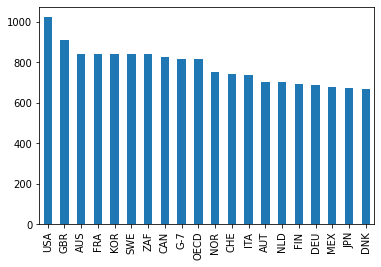

In [3]:
#Rapide visualisation pour voir qu'elle pays a le plus de data point
pays = pd.Series(data["LOCATION"].value_counts().head(20))
image = pays.plot(kind='bar')

Nous constatons qu'il n'y a pas le même nombre de data points par pays.
Dans un premier temps nous allons étudier les données de la France

In [4]:
#Jetons un coup d'yeux sur les données de la france
df_fra = data[data['LOCATION'] == "FRA"]
df_fra.head(3)

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
5096,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q1,3.971438,E
5097,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q2,5.239927,E
5098,FRA,QGDP,TOT,PC_CHGPY,Q,1961-Q3,6.121195,E


In [5]:
#Nous étudions les variables du dataset
print(df_fra['FREQUENCY'].value_counts())
print(df_fra['MEASURE'].value_counts())
print(df_fra['SUBJECT'].value_counts())
print(df_fra['INDICATOR'].value_counts())

Q    721
A    119
Name: FREQUENCY, dtype: int64
IDX         302
PC_CHGPP    300
PC_CHGPY    238
Name: MEASURE, dtype: int64
TOT       538
VOLIDX    302
Name: SUBJECT, dtype: int64
QGDP    840
Name: INDICATOR, dtype: int64


MEASURE :
PC_CHGPP signifie pourcentage de variation période précédente, uniquement disponible pour TOT. \n
PC_CHGPY signifie pourcentage de variation même période année précédente, uniquement disponible pour TOT.
IDX indice, uniquement disponible pour SUBJECT = VOLIDX.


SUBJECT:

TOT signifie Total.
VOLIDX signifie indice de volume.

Lien d'un excel récapitulatif :
https://loicvieu-drive.mycozy.cloud/public?sharecode=JCVlMBO0XjQX


In [14]:
gpy, gpp, ind = tr.traitementParPays(data, 'A')
tr.mobilMoy(gpp, 10)[0][1]

[5, 5.348055799916666]